### Análise exploratória de dados

In [1]:
#Importando os pacotes
import pandas as pd      
import matplotlib.pyplot as plt    
import numpy as np   
import seaborn as sns
from sklearn.model_selection import train_test_split
import ppscore as pps

In [76]:
df = pd.read_csv('dados_modf3-4000-janela.csv')
df = df.drop(['valor_h_1', 'valor_h_2', 'valor_h_3', 'valor_h_4', 'divisao', 'arquivo'], axis=1)

df = df[df['Condicao'] != 0]
df = df[df['Condicao'] != 1]
df = df[df['Condicao'] != 2]
df = df[df['Condicao'] != 3]
df = df[df['Condicao'] != 4]
df = df[df['Condicao'] != 5]

In [77]:
df['Condicao'] = df['Condicao'].replace(8, 2)
df['Condicao'] = df['Condicao'].replace(7, 1)
df['Condicao'] = df['Condicao'].replace(6, 0)

df['Condicao'] = df['Condicao'].replace(14, 2)
df['Condicao'] = df['Condicao'].replace(13, 1)
df['Condicao'] = df['Condicao'].replace(12, 0)

df['Condicao'] = df['Condicao'].replace(26, 2)
df['Condicao'] = df['Condicao'].replace(25, 1)
df['Condicao'] = df['Condicao'].replace(24, 0)

In [78]:
df.describe()

,Condicao,Freq,valor_rms_1,valor_rms_2,valor_rms_3,valor_rms_4,valor_sra_1,valor_sra_2,valor_sra_3,valor_sra_4,...,valor_fvar_3,valor_fvar_4,valor_fskew_1,valor_fskew_2,valor_fskew_3,valor_fskew_4,valor_fkur_1,valor_fkur_2,valor_fkur_3,valor_fkur_4
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,...,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000
mean,20.017609,37.000000,0.025852,0.027011,0.040440,0.025307,0.018227,0.017673,0.031038,0.017544,...,390588.968907,401346.804326,-0.029640,-0.305040,0.424993,-0.335887,31.453085,70.808136,19.795053,53.782805
std,13.785937,8.169695,0.013202,0.014475,0.026646,0.015466,0.009613,0.009238,0.020746,0.009693,...,95062.285844,81768.052110,0.428986,0.351483,0.883104,0.759782,26.054568,47.870958,21.317059,55.622533
min,0.000000,27.000000,0.003700,0.005183,0.003321,0.003262,0.002448,0.003292,0.002280,0.002236,...,176396.688932,215487.495565,-0.814669,-1.202914,-0.925396,-1.616080,4.449672,10.830245,3.485683,3.257168
25%,9.000000,27.000000,0.015475,0.015186,0.017185,0.013838,0.010245,0.010712,0.010496,0.009326,...,321711.560264,336522.048950,-0.392201,-0.592250,-0.311137,-0.956646,11.565170,28.625230,5.994049,7.321327
50%,21.000000,37.000000,0.026974,0.024294,0.037104,0.023996,0.018448,0.014903,0.025947,0.016743,...,394976.807760,399060.958891,-0.147514,-0.307855,0.207796,-0.581831,23.544791,58.849962,8.569082,36.152397
75%,33.000000,47.000000,0.036983,0.036704,0.062907,0.036649,0.026138,0.024175,0.048914,0.025464,...,478016.597077,474058.534433,0.318084,0.018384,1.042004,0.267670,41.490196,103.273948,27.319655,80.759370
max,41.000000,47.000000,0.056593,0.071787,0.624518,0.382334,0.039327,0.044748,0.293415,0.093262,...,589904.845620,589705.899031,1.027957,0.373992,2.608279,1.527889,167.920135,273.817368,114.778128,317.246588


In [79]:
df['valor_rms_1'] = df['valor_rms_1'].div(df['Freq'])
df['valor_rms_2'] = df['valor_rms_2'].div(df['Freq'])
df['valor_rms_3'] = df['valor_rms_3'].div(df['Freq'])
df['valor_rms_4'] = df['valor_rms_4'].div(df['Freq'])

### Visualizando dos atributos

Visualizando os dados para entender possíveis correlações de parâmetros calculados com os estados.

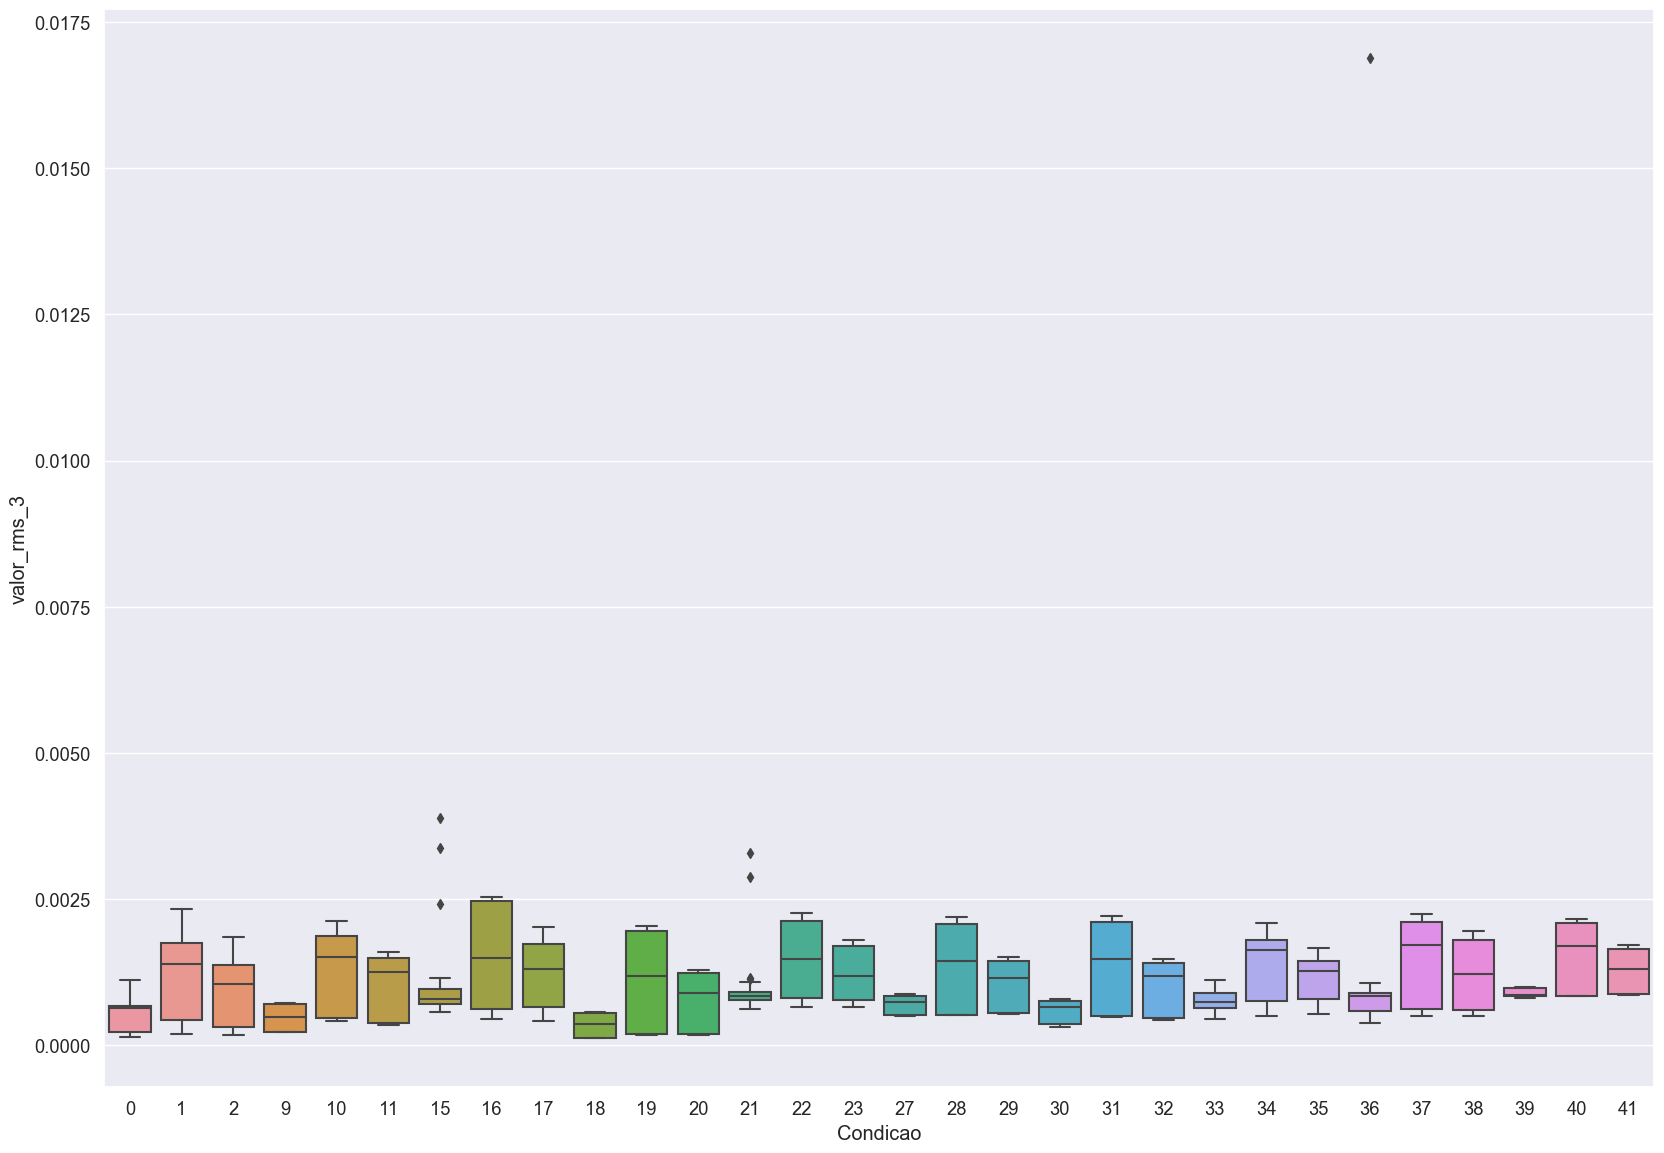

In [95]:
# valor_rms
fig, axes = plt.subplots(figsize=(20, 14), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_rms"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_rms_3"], data=df)
#plt.ylim(-0.05, 0.1)
plt.show()


<Axes: xlabel='Condicao', ylabel='valor_sra_2'>

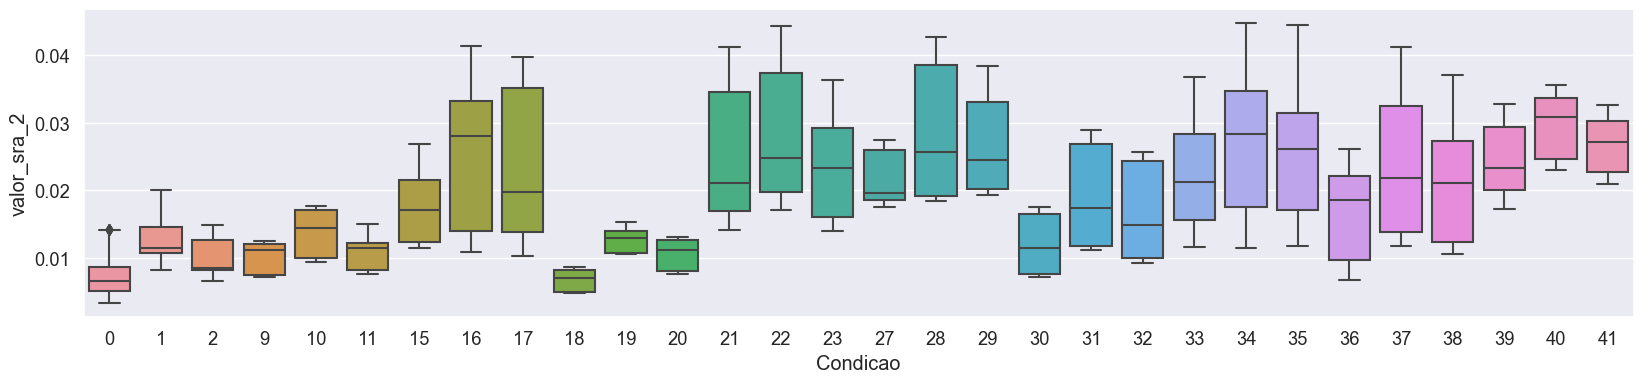

In [81]:
# valor_sra
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_sra"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_sra_2"], data=df)

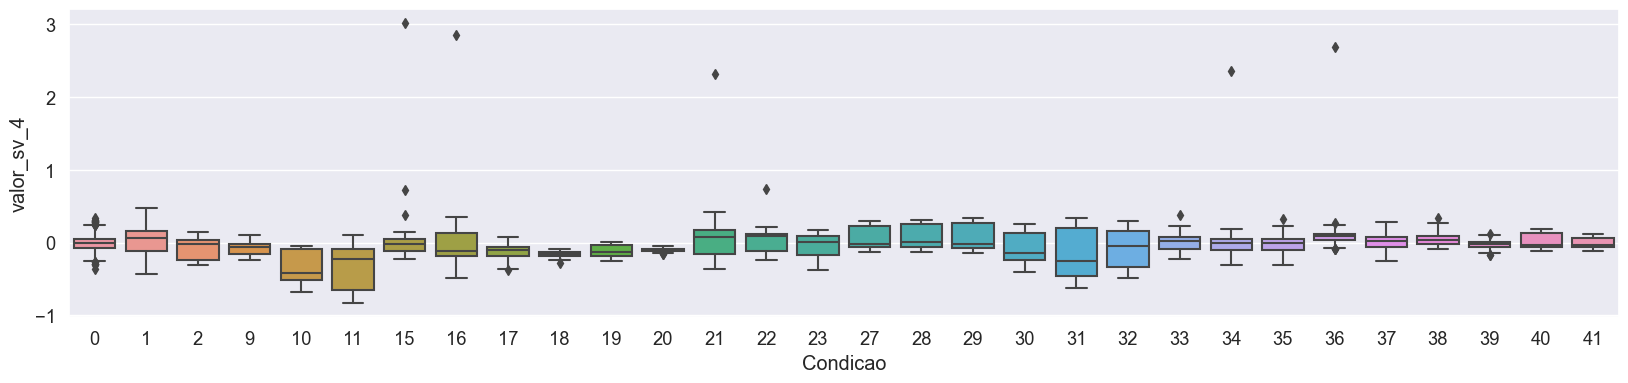

In [82]:
# valor_sv
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_sv"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_sv_4"], data=df)
#axes.set_ylim(-0.8, 0.75) # Ajusta o limite do eixo y para ficar entre 0 e 25
plt.show()

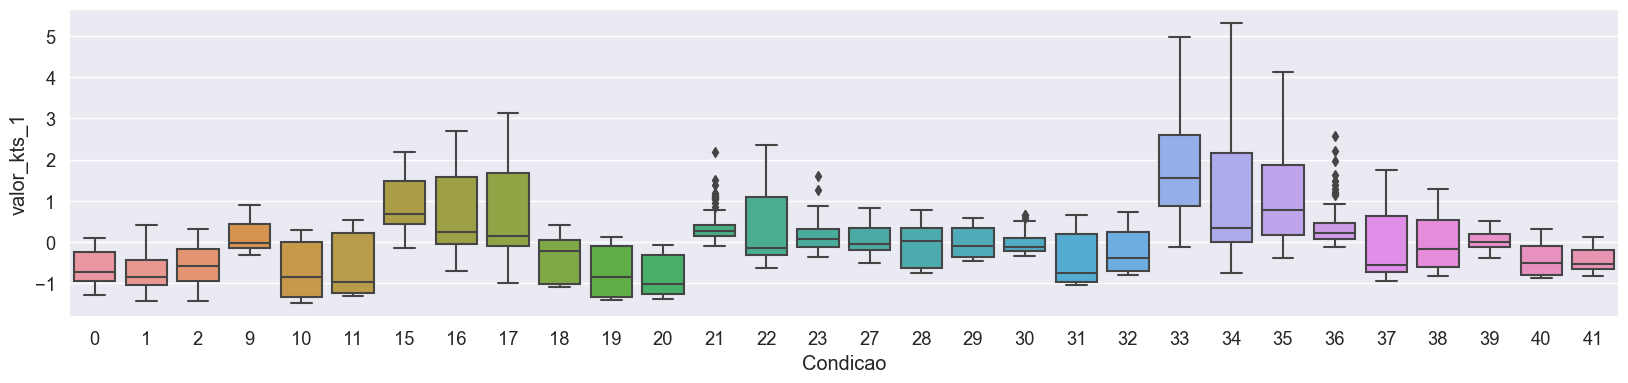

In [83]:
# valor_kts
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_kts"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_kts_1"], data=df)
#axes.set_ylim(-2, 7) # Ajusta o limite do eixo y para ficar entre 0 e 25
plt.show()

<Axes: xlabel='Condicao', ylabel='valor_ppv_4'>

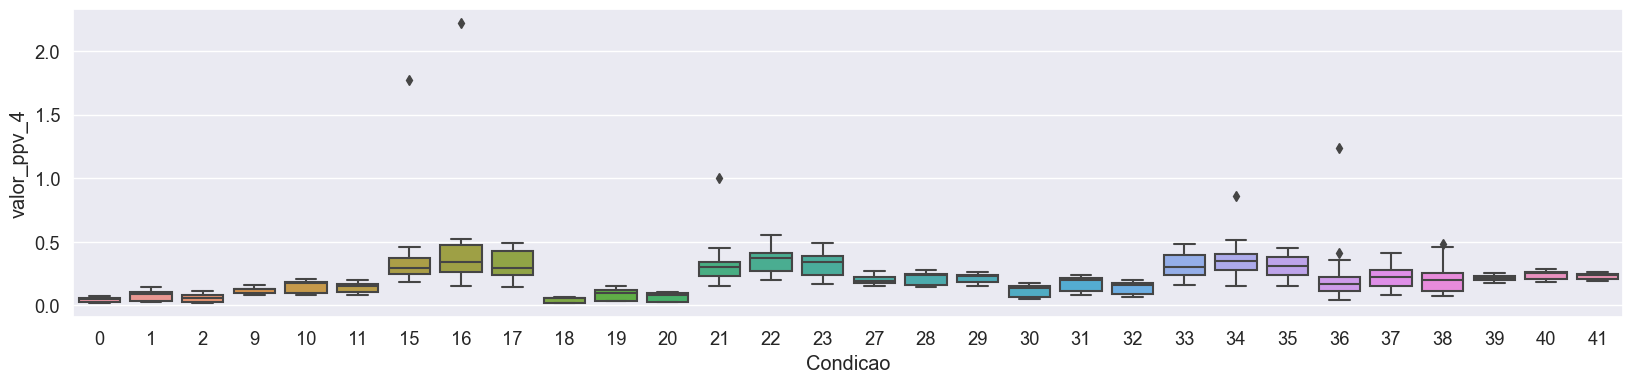

In [84]:
# valor_ppv
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_ppv"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_ppv_4"], data=df)

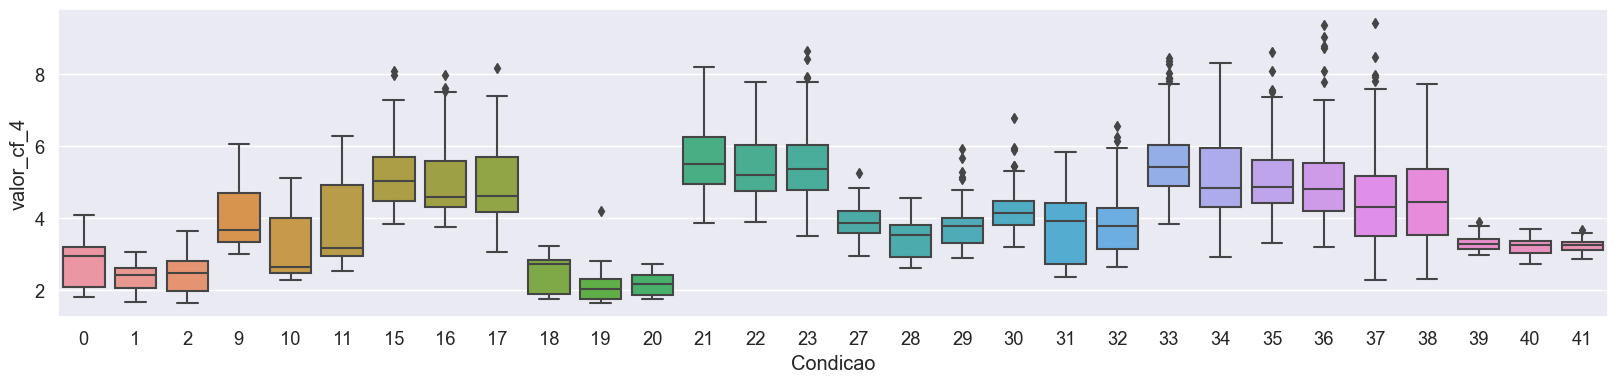

In [85]:
# valor_cf
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_cf"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_cf_4"], data=df)
#axes.set_ylim(1, 9.5) # Ajusta o limite do eixo y para ficar entre 0 e 25
plt.show()

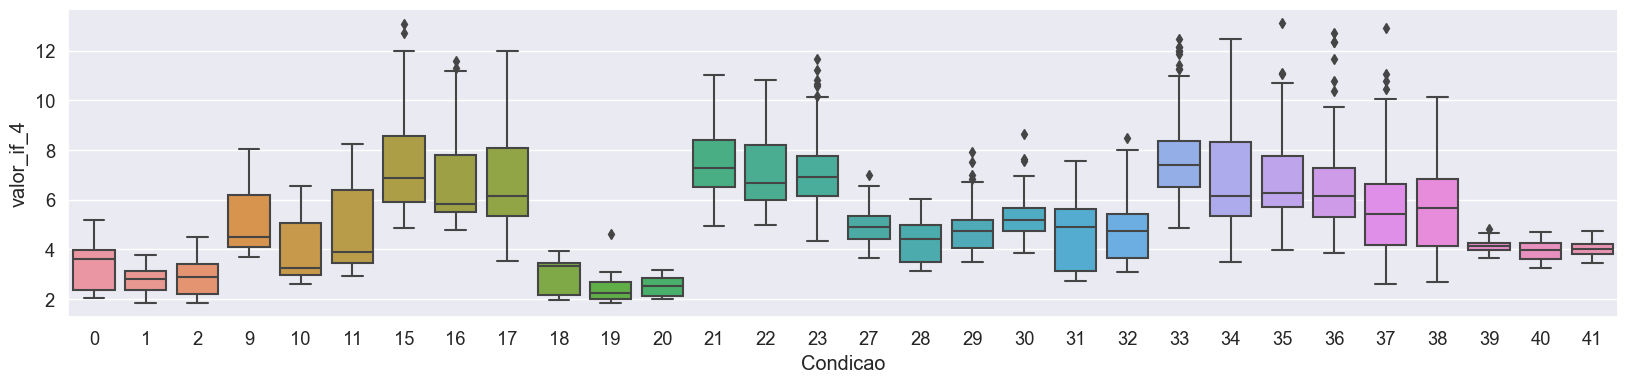

In [86]:
# valor_if
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_if"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_if_4"], data=df)
#axes.set_ylim(1, 13) # Ajusta o limite do eixo y para ficar entre 0 e 25
plt.show()

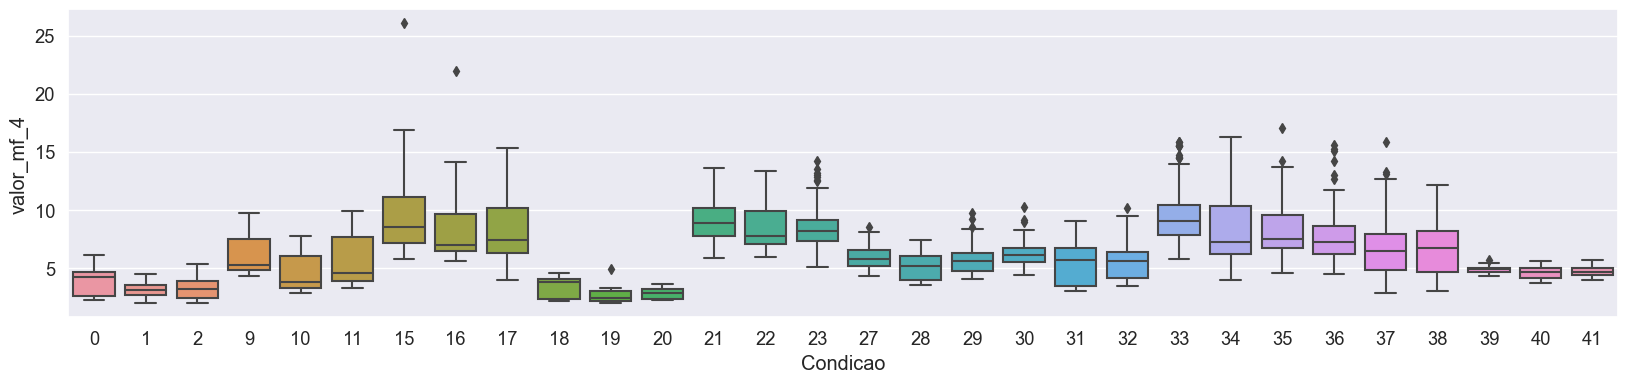

In [87]:
# valor_mf
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_mf"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_mf_4"], data=df)
#axes.set_ylim(0, 20) # Ajusta o limite do eixo y para ficar entre 0 e 25
plt.show()

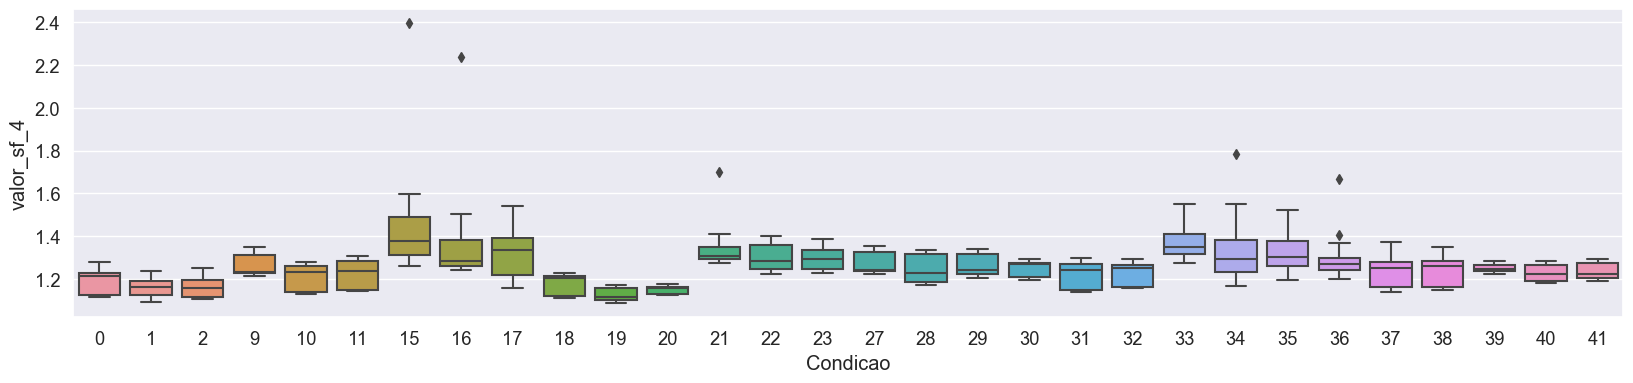

In [88]:
# valor_sf
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_sf"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_sf_4"], data=df)
#axes.set_ylim(1,1.65) # Ajusta o limite do eixo y para ficar entre 0 e 25
plt.show()

<Axes: xlabel='Condicao', ylabel='valor_kf_3'>

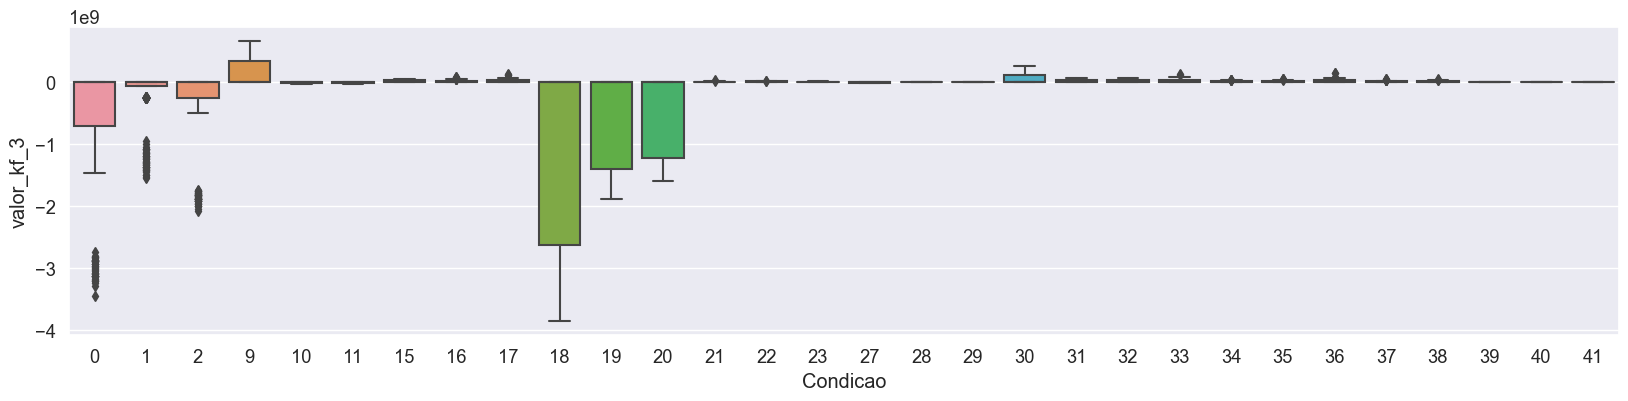

In [89]:
# valor_kf
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_kf"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_kf_3"], data=df)

<Axes: xlabel='Condicao', ylabel='valor_ffc_4'>

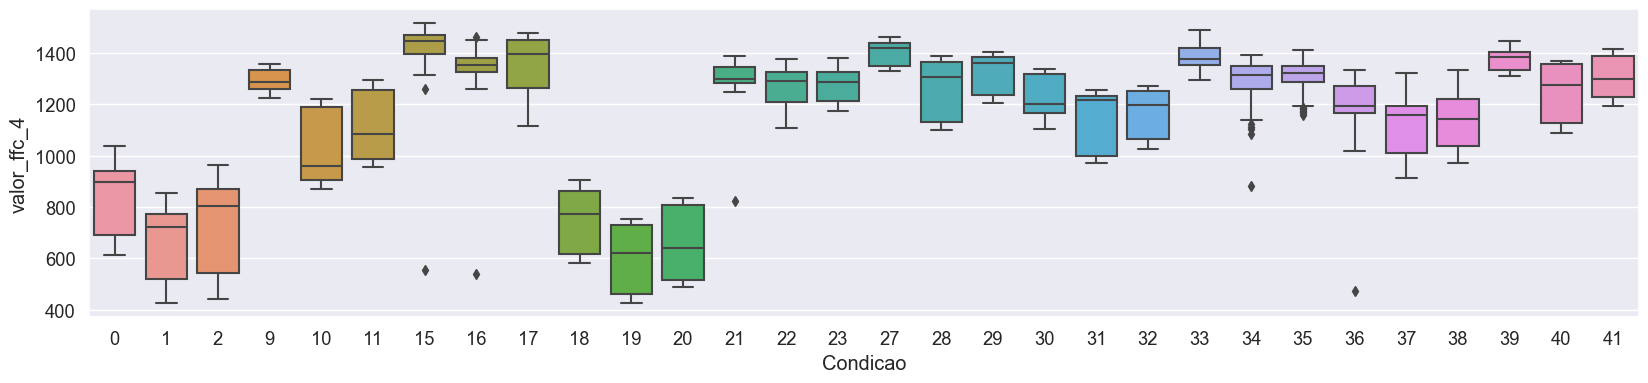

In [99]:
# valor_ffc
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_ffc"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_ffc_4"], data=df)

<Axes: xlabel='Condicao', ylabel='valor_fvar_4'>

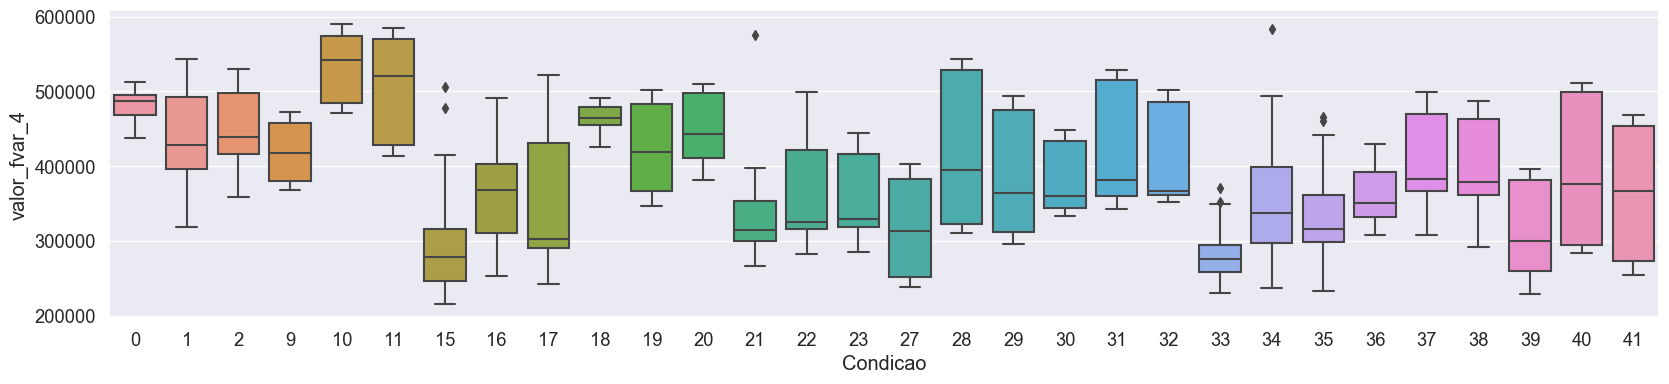

In [102]:
# valor_fvar
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_fvar"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_fvar_4"], data=df)

<Axes: xlabel='Condicao', ylabel='valor_fskew_4'>

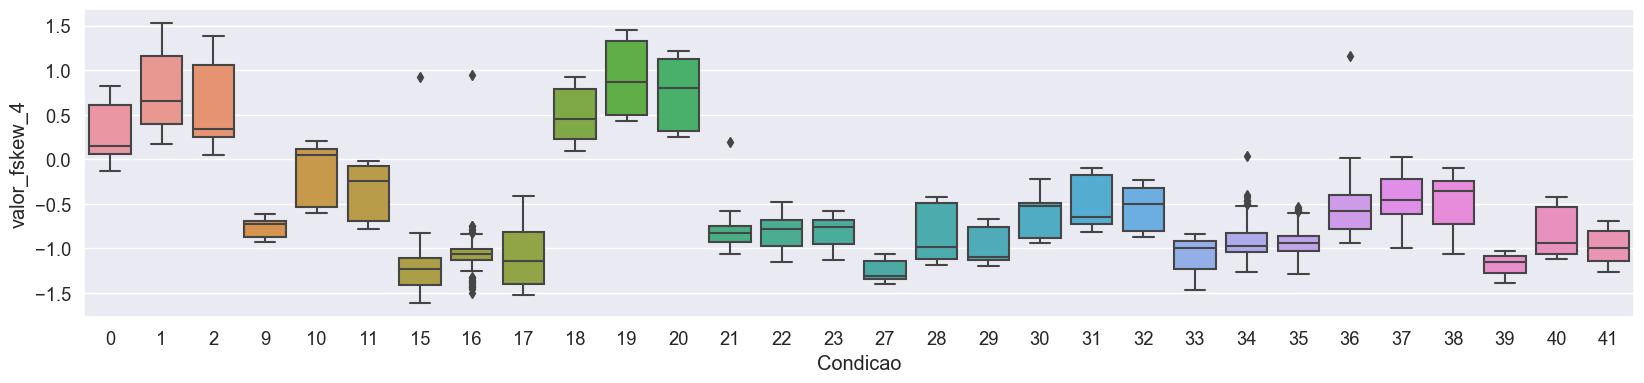

In [106]:
# valor_fskew
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_fskew"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_fskew_4"], data=df)

<Axes: xlabel='Condicao', ylabel='valor_fkur_4'>

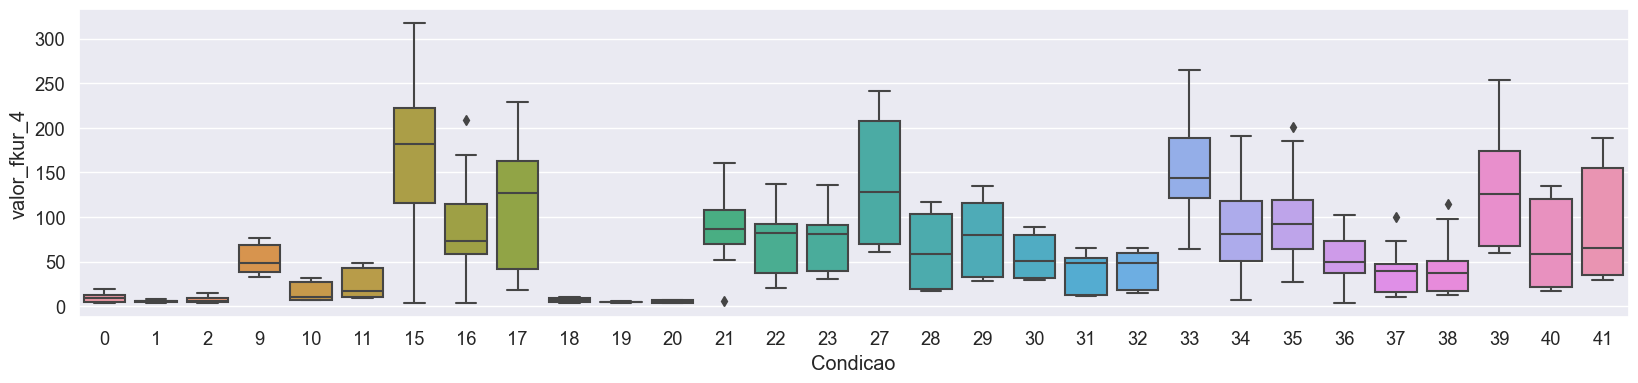

In [110]:
# valor_fkur
fig, axes = plt.subplots(figsize=(20, 4), sharex=True)
#sns.scatterplot(ax=axes, x=df['Condicao'], y=df["valor_fkur"], data=df)
sns.boxplot(ax=axes, x=df['Condicao'], y=df["valor_fkur_4"], data=df)

Nota-se que os parâmetros no domínio do tempo tem pouco variação individualmente com a condição, dado algumas excessões. Nessas excessões, somente poucas condições tiveram seus valores alterados com relação a média das demais condições.

No domínio do tempo, nota-se alterações nos parâmetros a partir da condição 25.

<b> Alguns pontos fugiram do range estabelecido pela média de desvio padrão. Ainda entender se de fato contam como outliers. </b>

In [94]:
col_temp_1 = ['Condicao', 
            'valor_rms_1', 'valor_sra_1', 'valor_sv_1', 'valor_kts_1', 'valor_ppv_1', 'valor_cf_1', 'valor_if_1', 'valor_mf_1',
            'valor_sf_1', 'valor_kf_1']

col_temp_2 = ['Condicao', 
            'valor_rms_2', 'valor_sra_2', 'valor_sv_2', 'valor_kts_2', 'valor_ppv_2', 'valor_cf_2', 'valor_if_2', 'valor_mf_2', 
            'valor_sf_2', 'valor_kf_2']

col_temp_3 = ['Condicao', 
            'valor_rms_3', 'valor_sra_3', 'valor_sv_3', 'valor_kts_3', 'valor_ppv_3', 'valor_cf_3', 'valor_if_3', 'valor_mf_3', 
            'valor_sf_3', 'valor_kf_3']

col_temp_4 = ['Condicao', 
            'valor_rms_4', 'valor_sra_4', 'valor_sv_4', 'valor_kts_4', 'valor_ppv_4', 'valor_cf_4', 'valor_if_4', 'valor_mf_4', 
            'valor_sf_4', 'valor_kf_4']

col_freq = ['Condicao', 
            'valor_ffc_1', 'valor_ffc_2', 'valor_ffc_3', 'valor_ffc_4', 
            'valor_fvar_1', 'valor_fvar_2', 'valor_fvar_3', 'valor_fvar_4', 
            'valor_fskew_1', 'valor_fskew_2', 'valor_fskew_3', 'valor_fskew_4', 
            'valor_fkur_1', 'valor_fkur_2', 'valor_fkur_3', 'valor_fkur_4']


df_temporal_1 = df[col_temp_1]
df_temporal_2 = df[col_temp_2]
df_temporal_3 = df[col_temp_3]
df_temporal_4 = df[col_temp_4]
df_frequencia = df[col_freq]

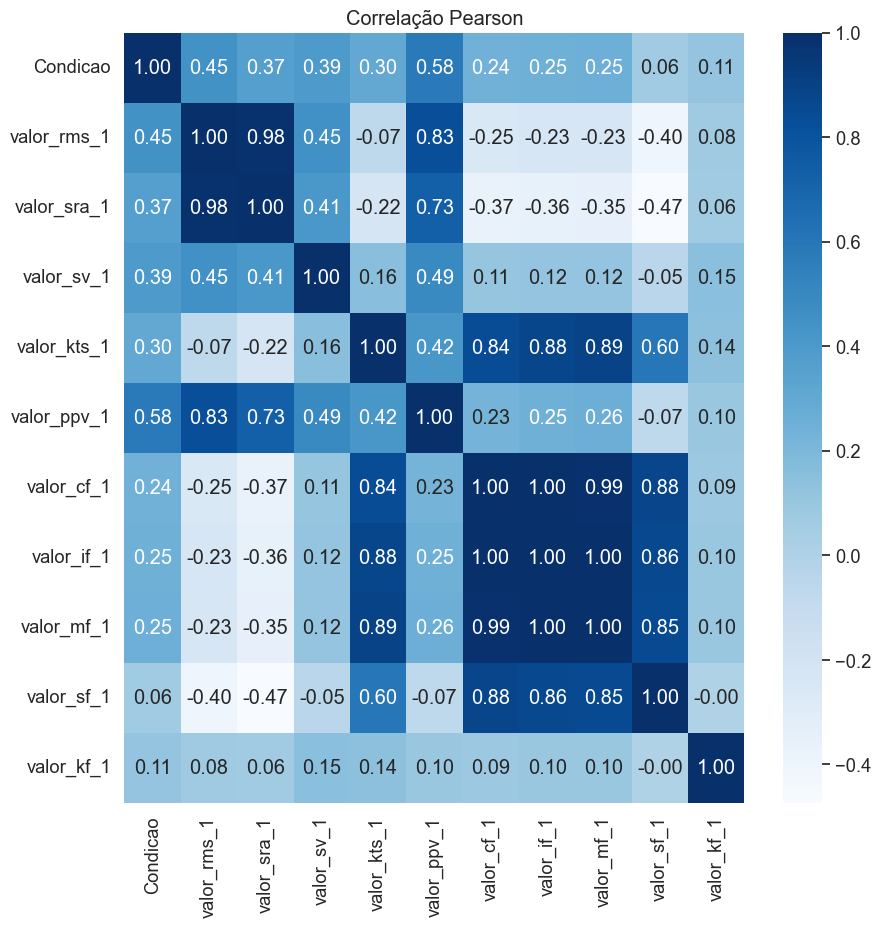

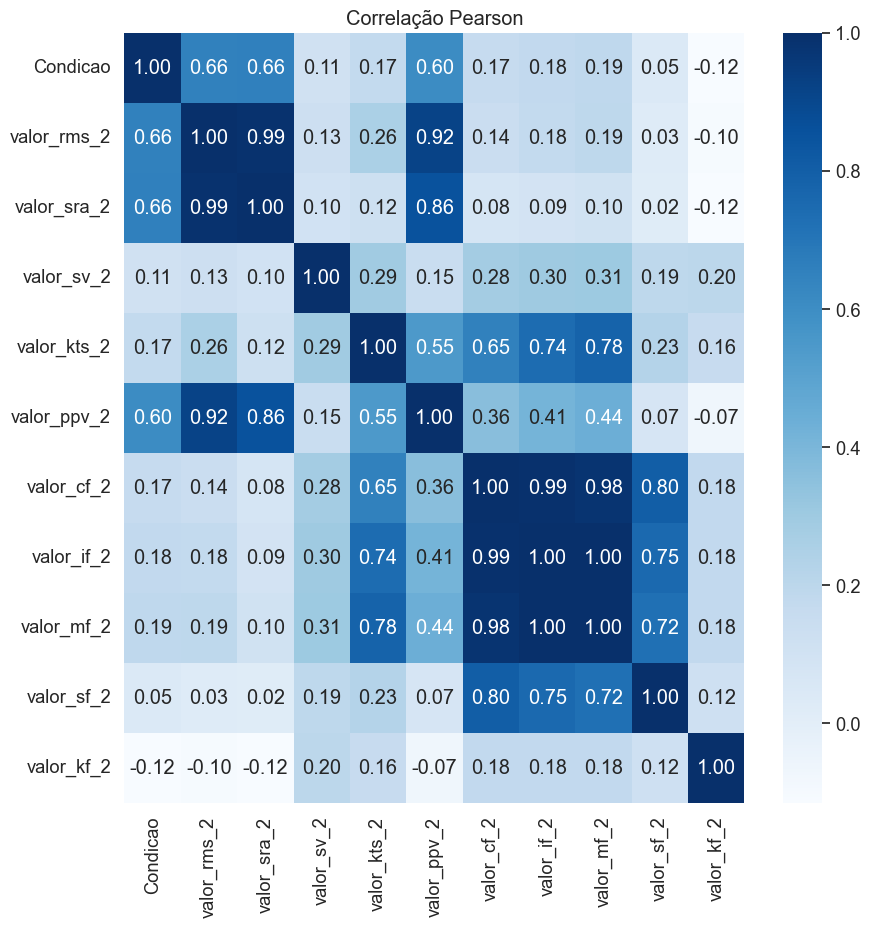

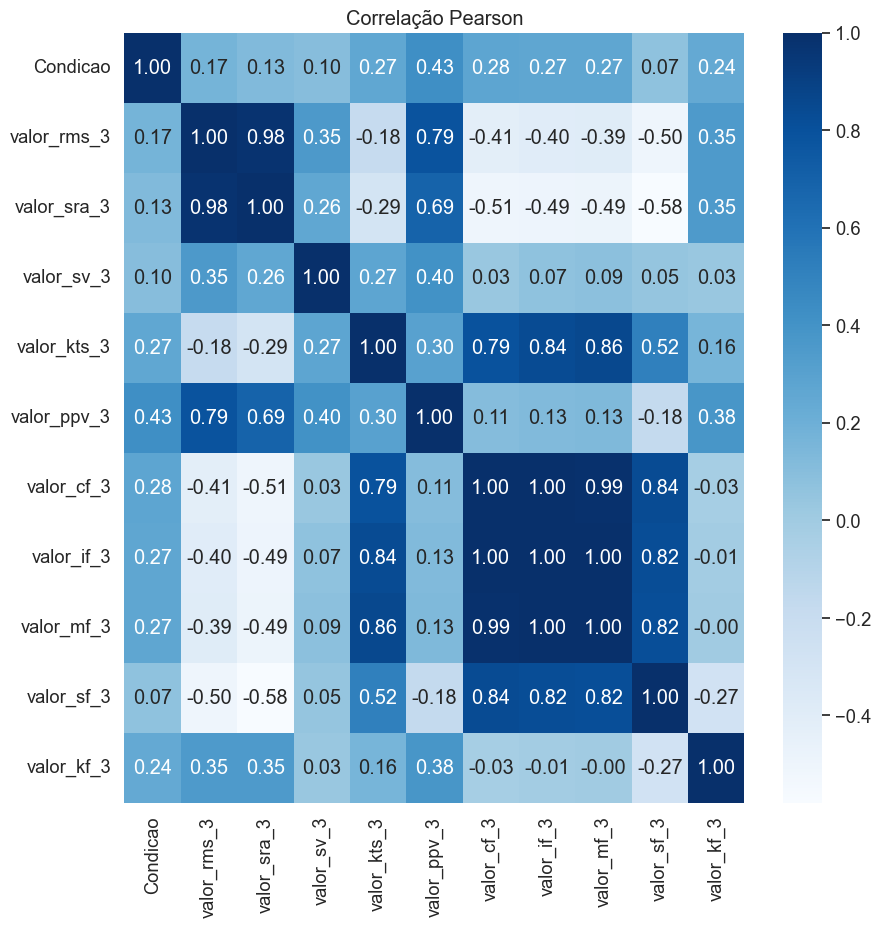

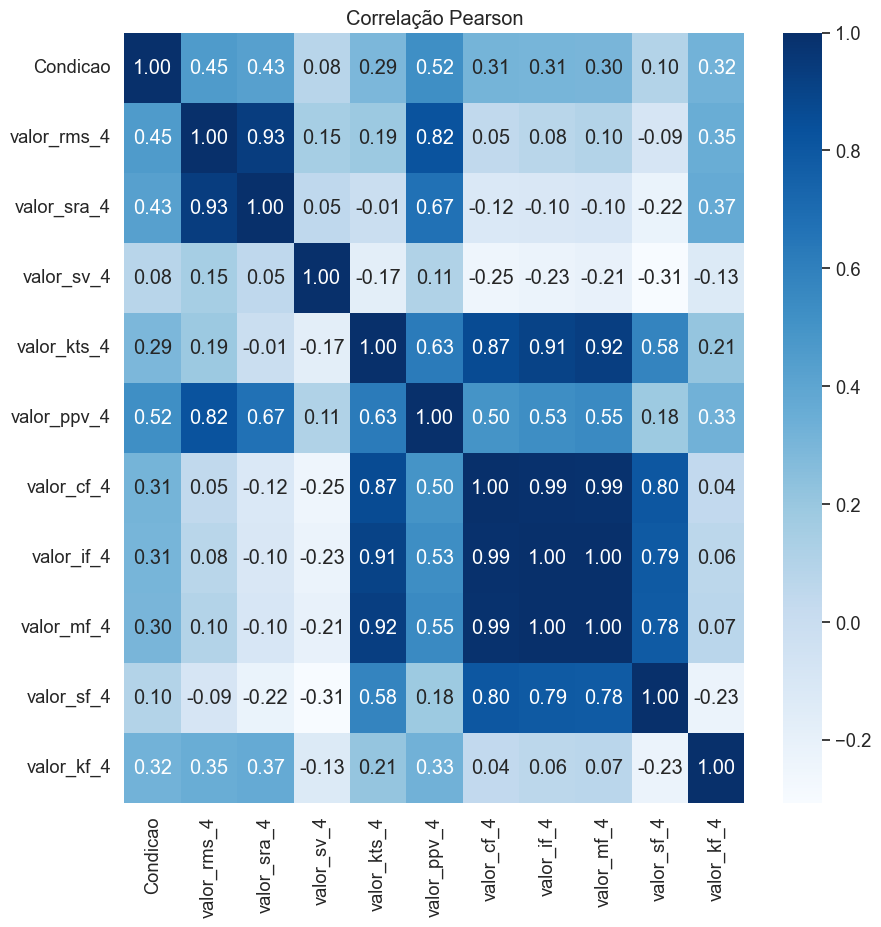

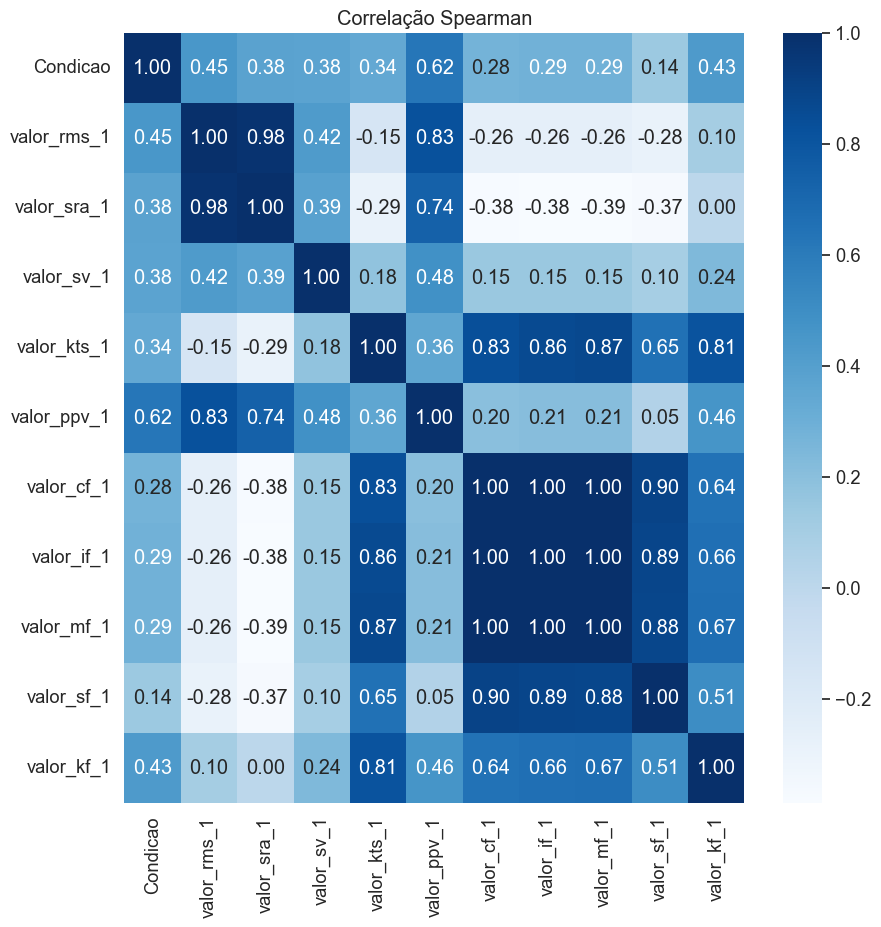

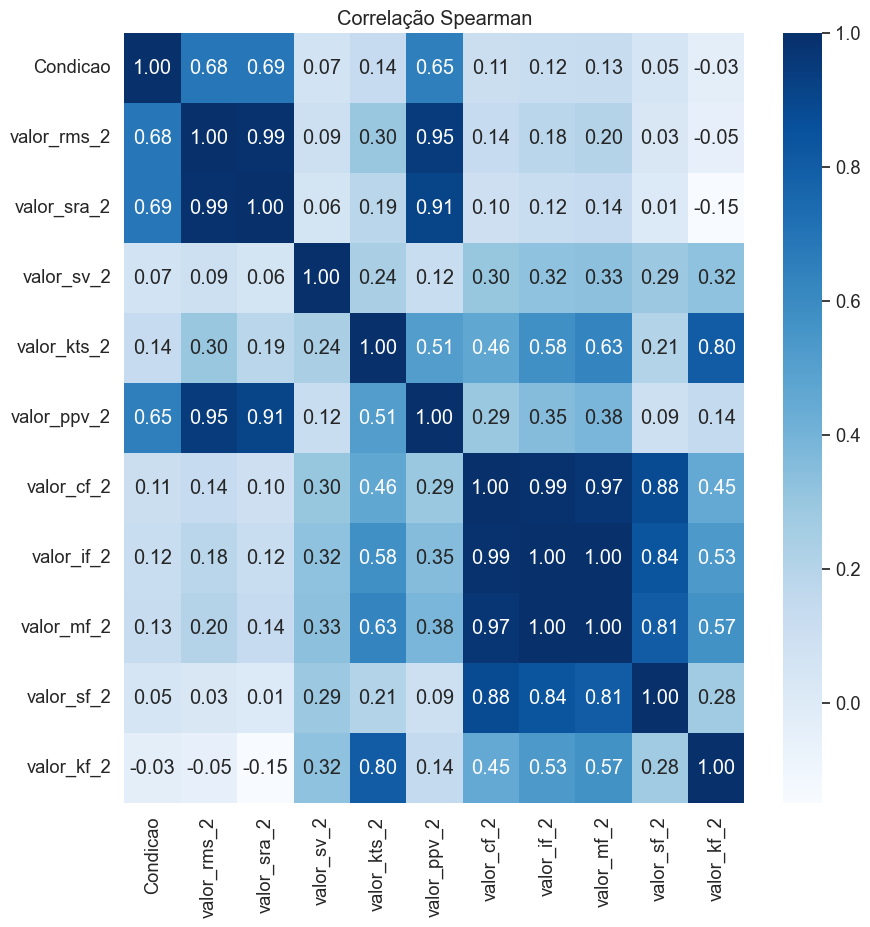

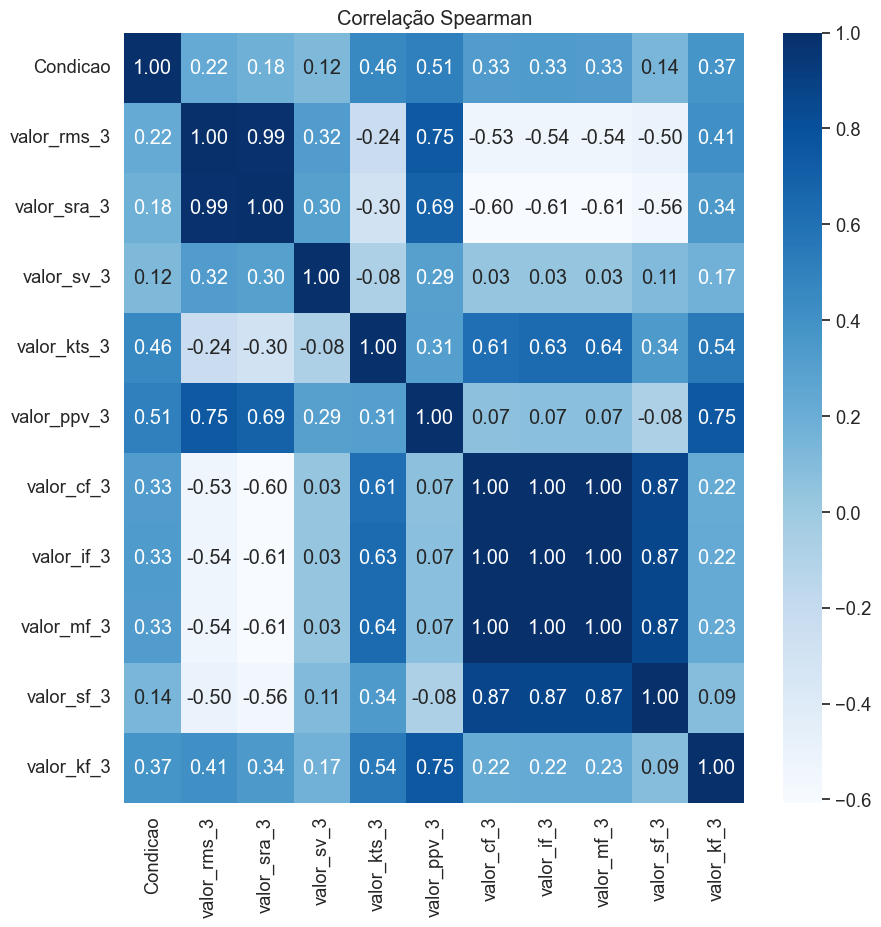

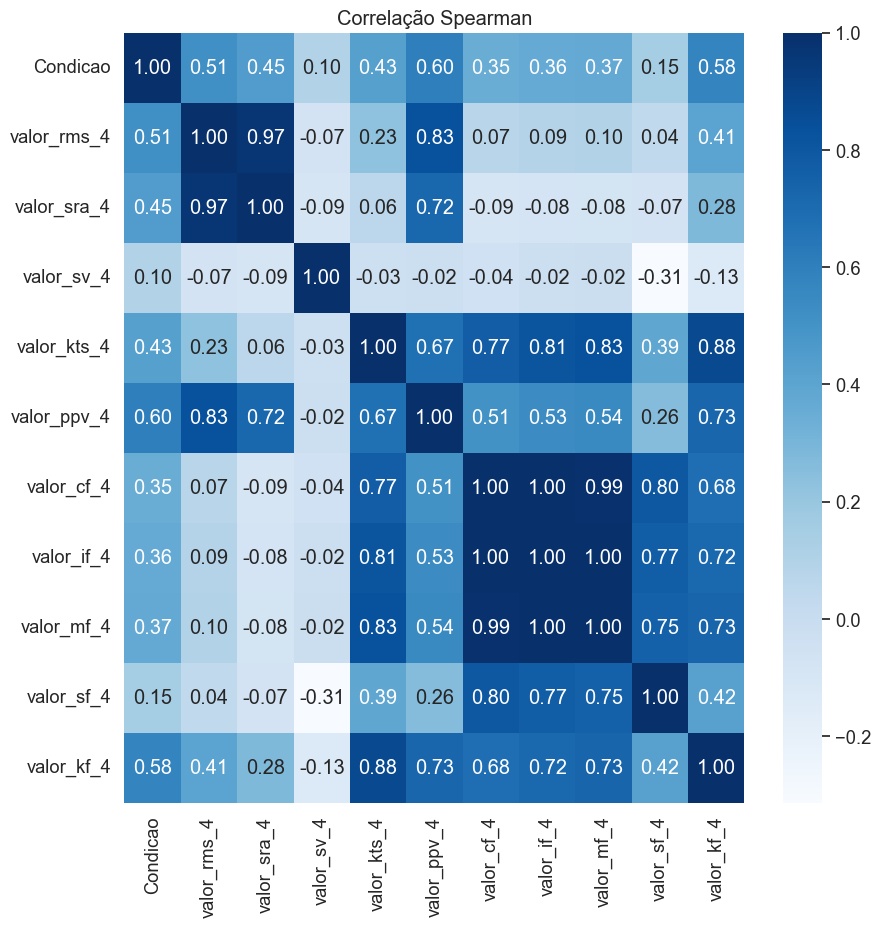

In [68]:
# Criando o gráfico com a correlação de cada variável em relação a todas as outras
plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_1.corr(), annot = True, fmt = '.2f', cmap='Blues')
sns.set(font_scale=1.2)
plt.title('Correlação Pearson')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_2.corr(), annot = True, fmt = '.2f', cmap='Blues')
sns.set(font_scale=1.2)
plt.title('Correlação Pearson')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_3.corr(), annot = True, fmt = '.2f', cmap='Blues')
sns.set(font_scale=1.2)
plt.title('Correlação Pearson')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_4.corr(), annot = True, fmt = '.2f', cmap='Blues')
sns.set(font_scale=1.2)
plt.title('Correlação Pearson')
plt.show()

# -----------------------------------------------------------------------------------------

plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_1.corr(method = 'spearman'), annot = True, fmt = '.2f', cmap='Blues') 
sns.set(font_scale=1.2)
plt.title('Correlação Spearman')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_2.corr(method = 'spearman'), annot = True, fmt = '.2f', cmap='Blues') 
sns.set(font_scale=1.2)
plt.title('Correlação Spearman')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_3.corr(method = 'spearman'), annot = True, fmt = '.2f', cmap='Blues') 
sns.set(font_scale=1.2)
plt.title('Correlação Spearman')
plt.show()

plt.figure(figsize=(10, 10))
sns.heatmap(df_temporal_4.corr(method = 'spearman'), annot = True, fmt = '.2f', cmap='Blues') 
sns.set(font_scale=1.2)
plt.title('Correlação Spearman')
plt.show()

# ---------------------------------------------------------------------------------------------

# plt.figure(figsize=(10, 10))
# matrix_df = pps.matrix(df_temporal)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
# sns.set(font_scale=1.2)
# plt.title('Correlação PPS')
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

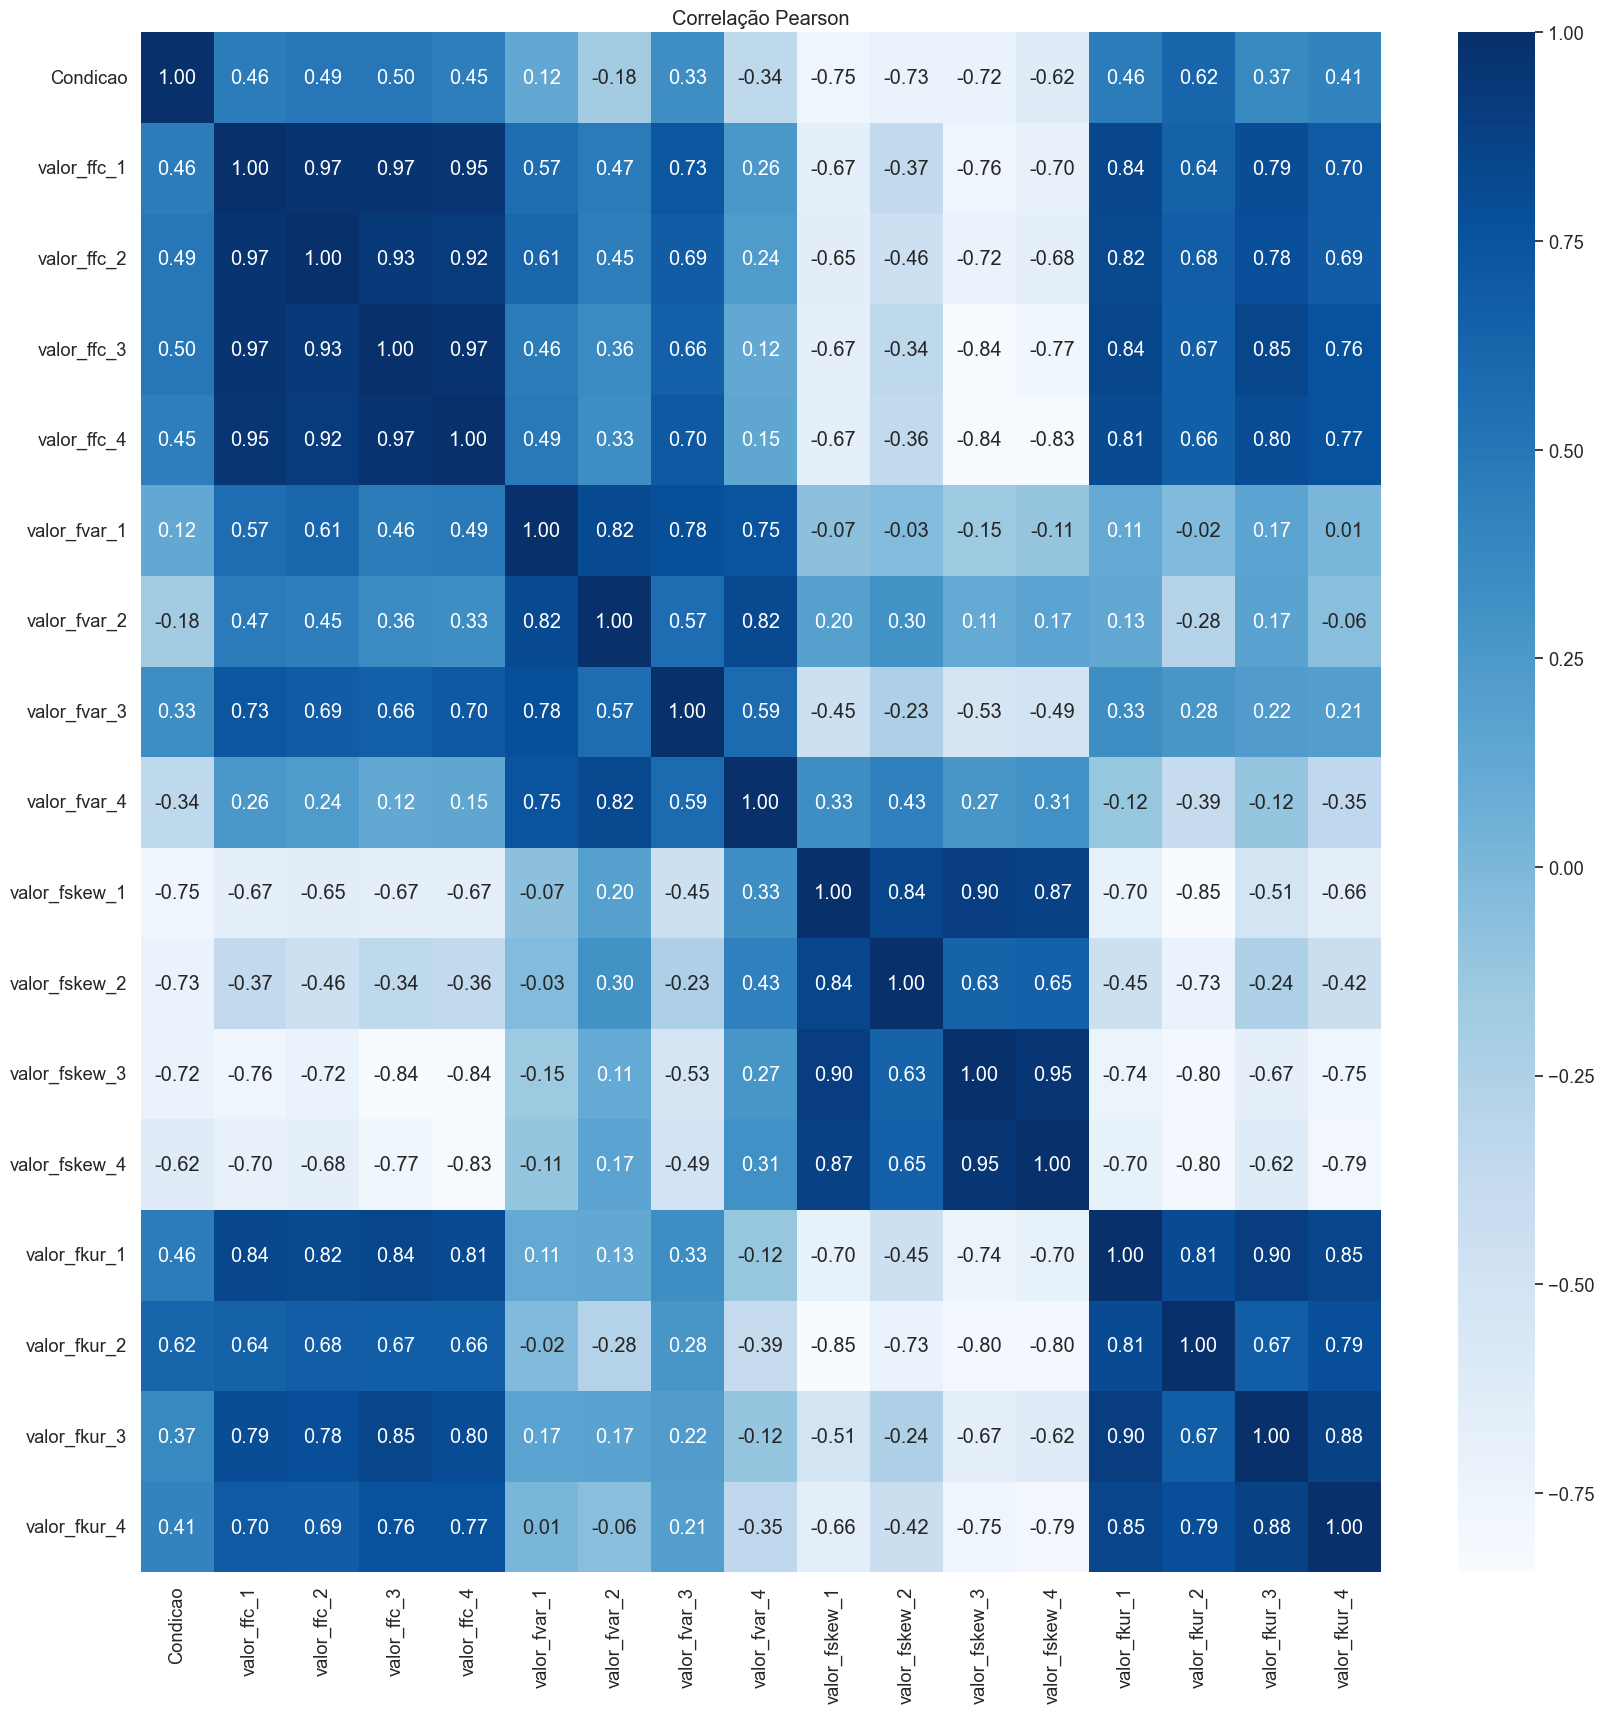

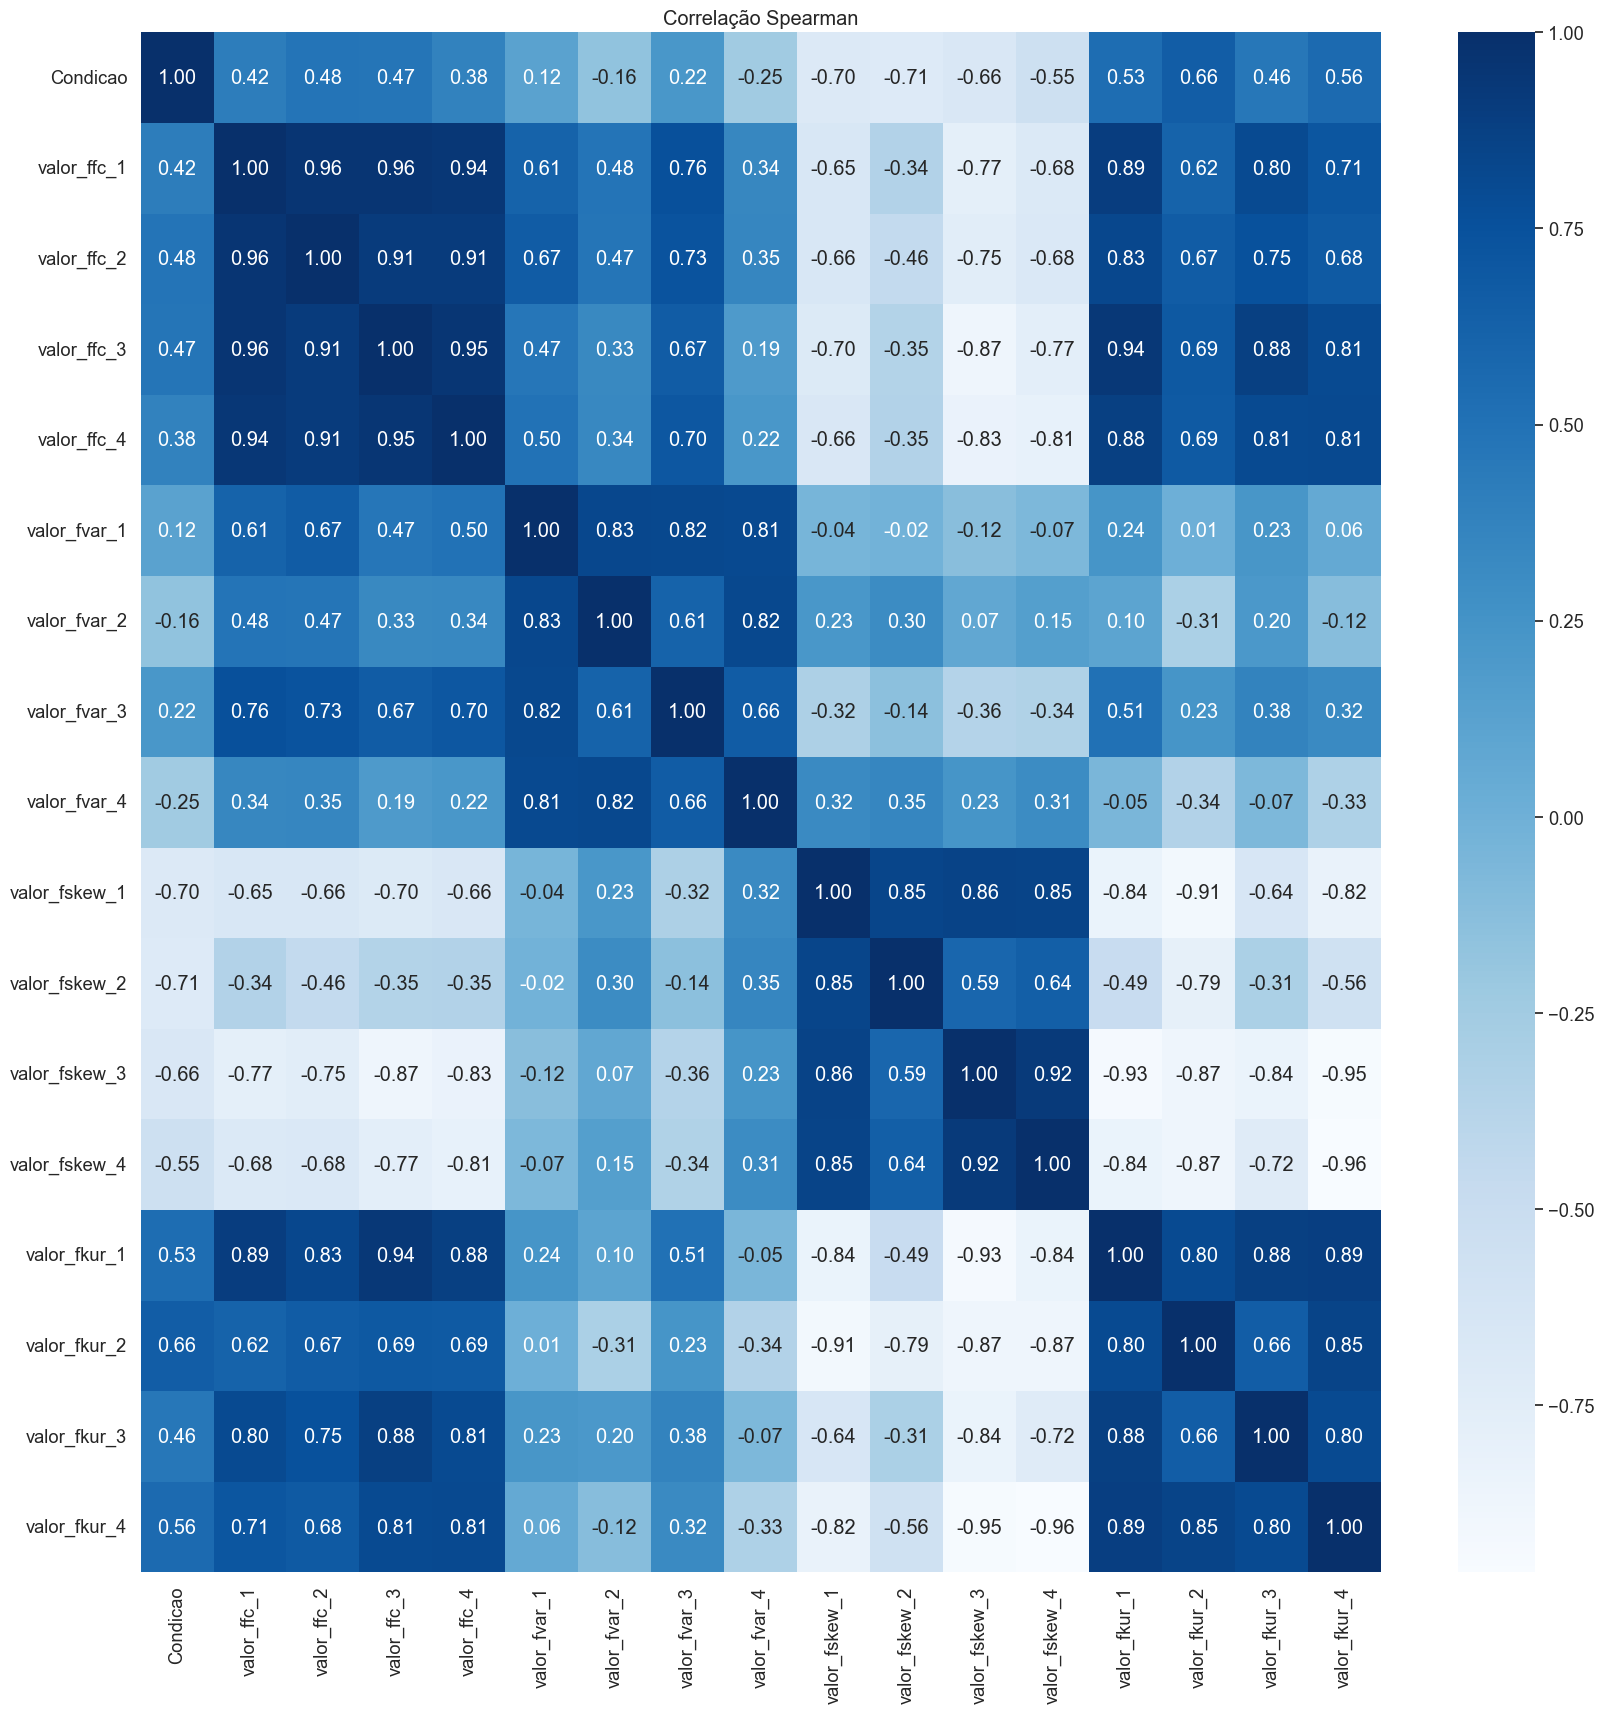

<Axes: title={'center': 'Correlação PPS'}, xlabel='x', ylabel='y'>

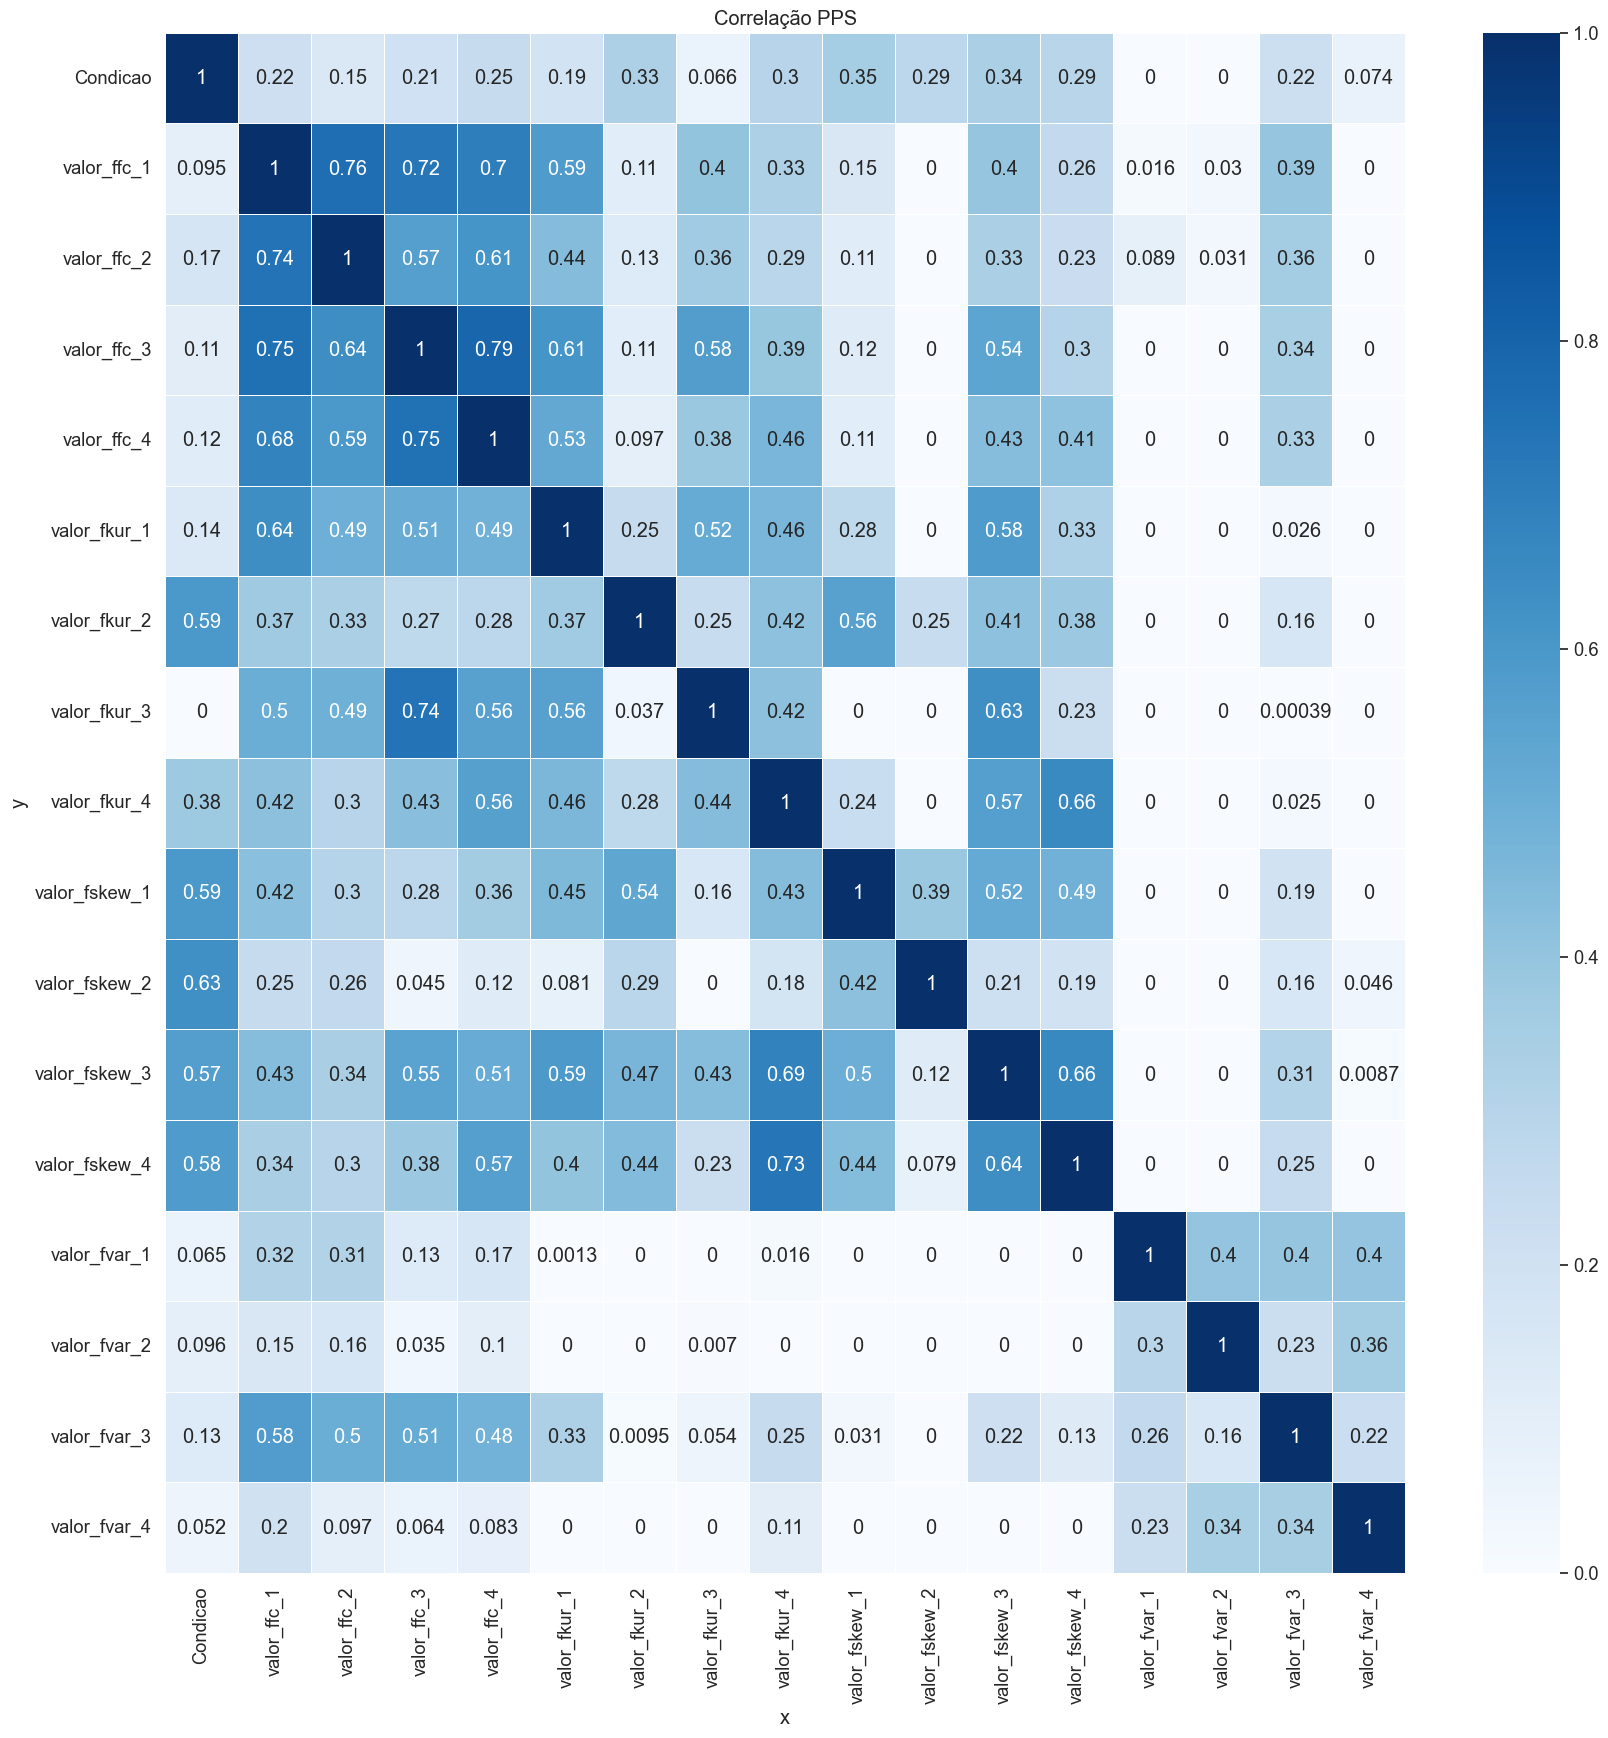

In [69]:
# Criando o gráfico com a correlação de cada variável em relação a todas as outras
plt.figure(figsize=(20, 20))
sns.heatmap(df_frequencia.corr(), annot = True, fmt = '.2f', cmap='Blues')
sns.set(font_scale=1.2)
plt.title('Correlação Pearson')
plt.show()

plt.figure(figsize=(20, 20))
sns.heatmap(df_frequencia.corr(method = 'spearman'), annot = True, fmt = '.2f', cmap='Blues') 
sns.set(font_scale=1.2)
plt.title('Correlação Spearman')
plt.show()

plt.figure(figsize=(20, 20))
matrix_df = pps.matrix(df_frequencia)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.set(font_scale=1.2)
plt.title('Correlação PPS')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Entendendo quais parâmetros tem alta correlação com outros e quais não tem relação nenhuma e podem ser descartados.